In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import get_fin_data as gfd
from pairs_methods import distance_approach as dist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
petr = gfd.get_close_price("PETR4.SA", "2021-01-01")
print(petr.head())

[*********************100%***********************]  1 of 1 completed
Date
2021-01-04    13.732214
2021-01-05    14.268961
2021-01-06    14.297462
2021-01-07    14.724959
2021-01-08    14.781961
Name: Adj Close, dtype: float64


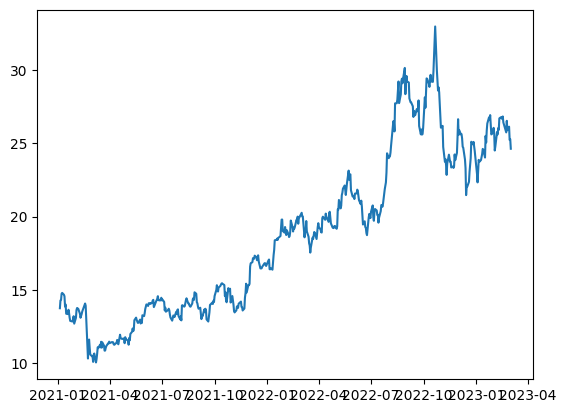

In [5]:
fig, ax = plt.subplots()
ax.plot(petr.index, petr)
plt.show()

In [7]:
# create random series to simulate and test functions

x = np.random.randn(100)/100
x = np.cumprod(1 + x)
x *= 5
x = pd.Series(x)

y = np.random.randn(100)/100
y = np.cumprod(1 + y) 
y *= 6
y = pd.Series(y)

print(x.head())
print(y.head())

0    4.944119
1    4.928143
2    4.921586
3    4.926844
4    4.902409
dtype: float64
0    6.055664
1    6.045700
2    6.120737
3    6.153220
4    6.244177
dtype: float64


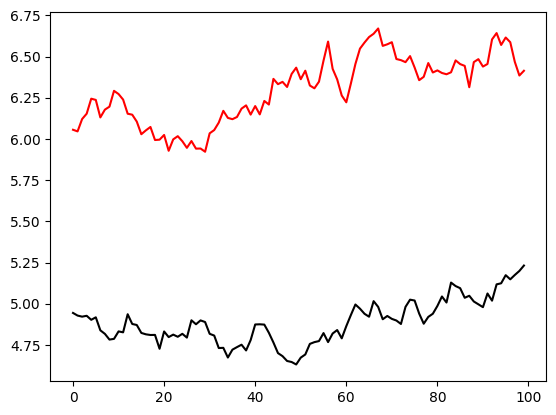

In [8]:
### plot series
fig, ax = plt.subplots()
ax.plot(x.index, x, color="black")
ax.plot(y.index, y, color="red")
plt.show()

In [53]:
x_normalized = dist.normalize_serie(x)
print(x_normalized.head())

y_normalized = dist.normalize_serie(y)
print(y_normalized.tail())

0    0.921996
1    1.000000
2    0.882656
3    0.897690
4    0.905150
dtype: float64
95    0.146628
96    0.261199
97    0.157474
98    0.184692
99    0.286672
dtype: float64


In [54]:
spread = dist.distance_spread(x_normalized, y_normalized)
print(spread.head())

0    1.171122
1    1.571644
2    1.055871
3    1.061285
4    1.501157
dtype: float64


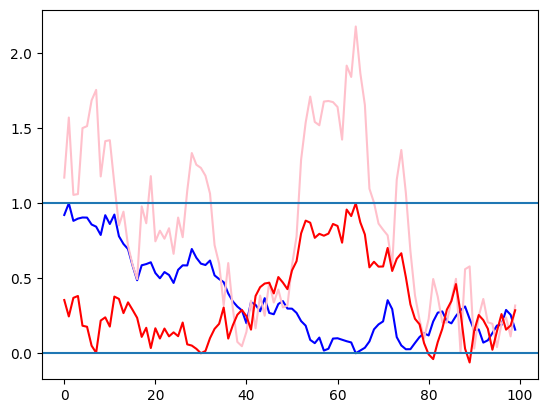

In [56]:
fig, ax = plt.subplots()
ax.plot(x_normalized.index, x_normalized, color="blue")
ax.plot(spread.index, spread, color="pink")
ax.plot(y_normalized.index, y_normalized, color="red")
ax.axhline(1)
ax.axhline(0)
plt.show()